# Top 50 Matplotlib plots useful in data analysis

- A compilation of the Top 50 matplotlib plots most useful in data analysis and visualization. 
- This list lets you choose what visualization to show for what situation using python’s matplotlib and seaborn library.
- This notebook is based on [Tutorial](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/) but have modifed some errors and warning messages.

## Contents

1. Correlation
2. Deviation
3. Ranking
4. Distribution
5. Composition
6. Change
7. Groups

In [2]:
# Importing a library

# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.6.3
0.12.2


/var/folders/70/mjvqrvwx3bq1l13s7hb_pm4h0000gn/T/ipykernel_97174/3767595427.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Details

### Correlation

   - Scatter plot
   - Bubble plot with Encircling
   - Scatter plot with line of best fit
   - Jittering with stripplot
   - Counts Plot
   - Marginal Histogram
   - Marginal Boxplot
   - Correlogram
   - Pairwise Plot

1. Scatter plot

- Scatteplot is a classic and fundamental plot used to study the relationship between two variables. 
- If you have multiple groups in your data you may want to visualise each group in a different color. 
- In matplotlib, you can conveniently do this using `plt.scatterplot()`.

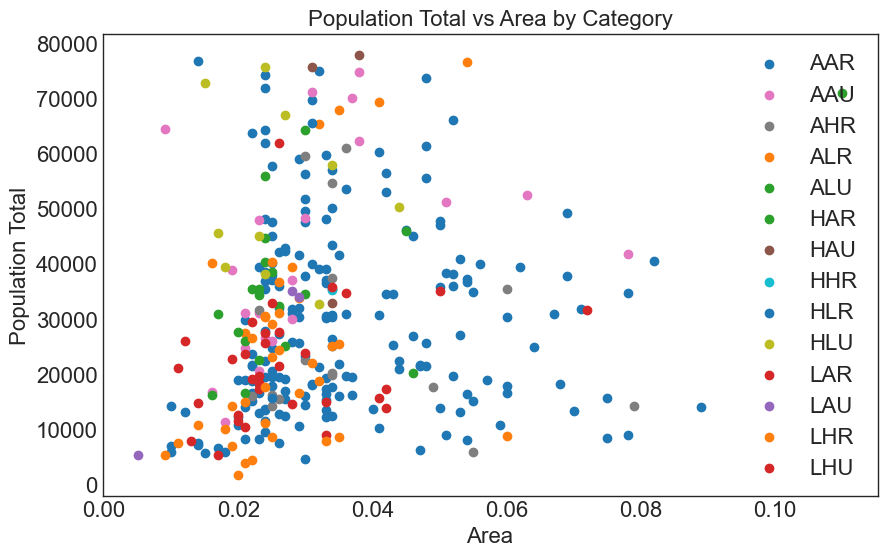

In [55]:
# Import dataset 
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Dictionary to store color mappings for each unique category
category_colors = {
    category: f'C{i}' for i, category in enumerate(df['category'].unique())
}

# Loop through unique categories and plot each category separately with a different color
for category, group in df.groupby('category'):
    ax.scatter(group['area'], group['poptotal'], label=category, color=category_colors[category])

# Set labels and title
ax.set_xlabel('Area')
ax.set_ylabel('Population Total')
ax.set_title('Population Total vs Area by Category')

# Show legend
ax.legend()

# Show the plot
plt.show()

2. Bubble plot with Encircling
   
- Sometimes you want to show a group of points within a boundary to emphasize their importance. 
- In this example, you get the records from the dataframe that should be encircled and pass it to the `encircle()` described in the code below.

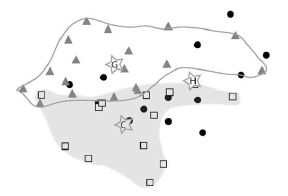

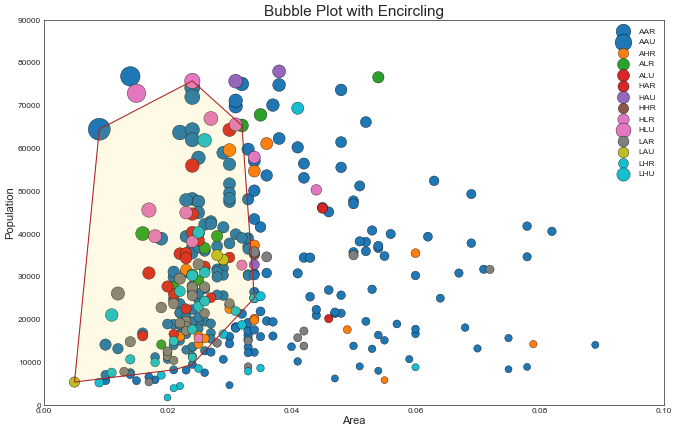

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings
warnings.simplefilter('ignore')  # Ignore all warnings (not recommended for production code)

# Step 1: Prepare Data
df1 = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(df1['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 50, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=df1.loc[df1.category==category, :], s='dot_size', color=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
def encircle(x, y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
df1_encircle_data = df1.loc[df1.state=='IN', :]

# Draw polygon surrounding vertices    
encircle(df1_encircle_data.area, df1_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(df1_encircle_data.area, df1_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()
   

3. Scatter plot with linear regression line of best fit

- If you want to understand how two variables change with respect to each other, the line of best fit is the way to go. 
- The below plot shows how the line of best fit differs amongst various groups in the data. 
- To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the `hue='cyl'` parameter from the `sns.lmplot()` call below.

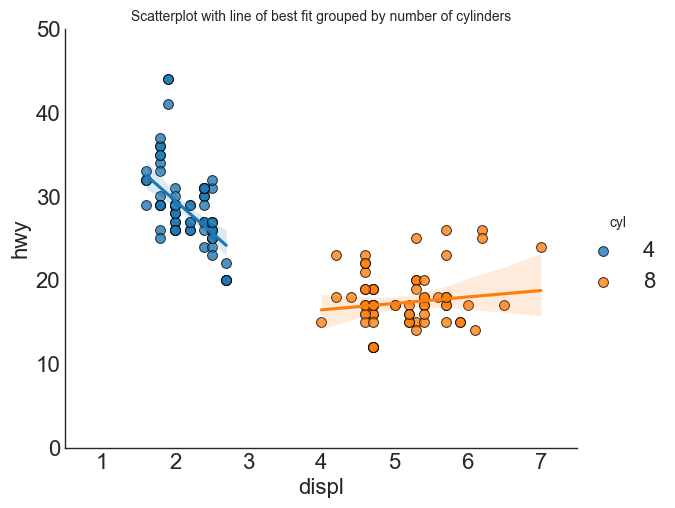

In [37]:
# Import Data
df2 = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df2_select = df2.loc[df2.cyl.isin([4, 8]), :]

# Plot with reduced image size
sns.set_style("white")
gridobj = sns.lmplot(
    x="displ",
    y="hwy",
    hue="cyl",
    data=df2_select,
    height=5,    # Reduce the height to 5 inches
    aspect=1.2,  # Adjust the width-to-height ratio
    robust=True,
    palette= 'tab10', # Use palette='Set1', and col="cyl", for showing each regression lines in two different columns of figures.
    scatter_kws=dict(s=50, linewidths=.7, edgecolors='black')
)

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=10)
plt.show()

4. Jittering with stripplot

- Often multiple datapoints have exactly the same X and Y values. 
- As a result, multiple points get plotted over each other and hide. 
- To avoid this, jitter the points slightly so you can visually see them. 
- This is convenient to do using seaborn’s stripplot().

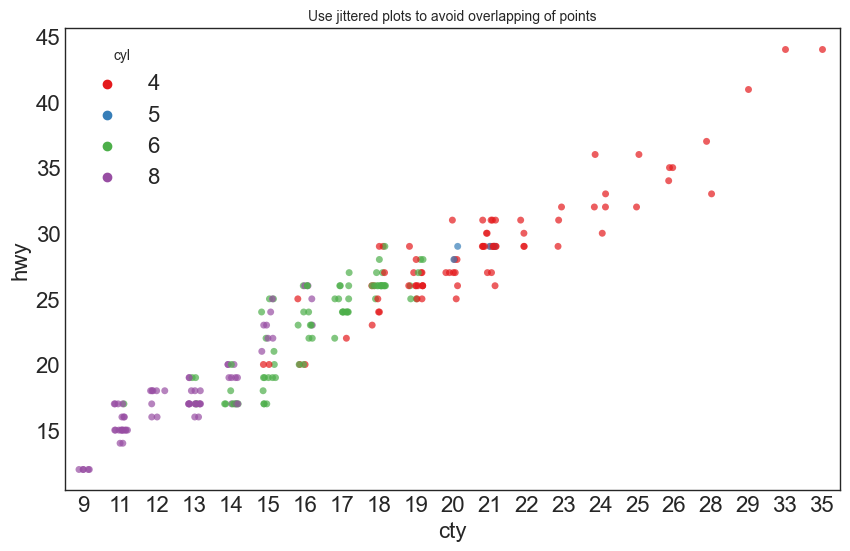

In [56]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Draw Stripplot with jitter and different colors
plt.figure(figsize=(10, 6))
sns.stripplot(x='cty', y='hwy', data=df, jitter=0.2, hue='cyl', palette='Set1', alpha=0.7)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=10)
plt.xlabel('cty')
plt.ylabel('hwy')
plt.legend(title='cyl')
plt.show()

5. Counts Plot

- Another option to avoid the problem of points overlap is the increase the size of the dot depending on how many points lie in that spot. 
- So, larger the size of the point more is the concentration of points around that.

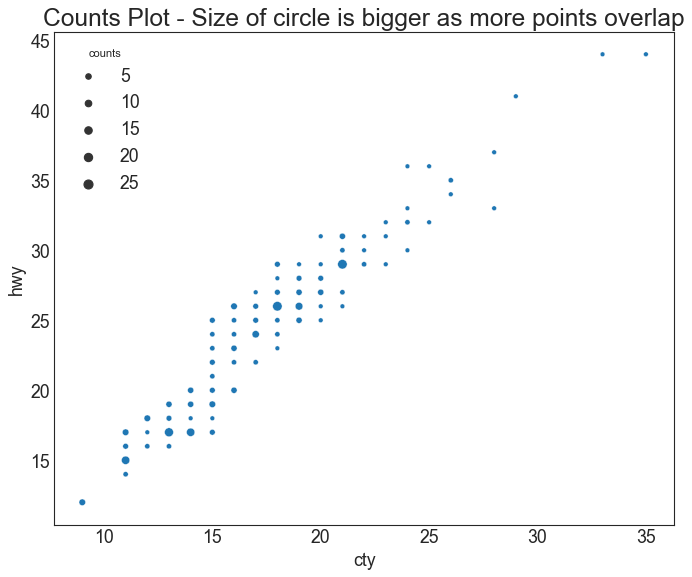

In [54]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
sns.scatterplot(x='cty', y='hwy', data=df_counts, size=df_counts['counts']*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

6. Marginal Histogram

- Marginal histograms have a histogram along the X and Y axis variables. 
- This is used to visualize the relationship between the X and Y along with the univariate distribution of the X and the Y individually. 
- This plot if often used in exploratory data analysis (EDA).

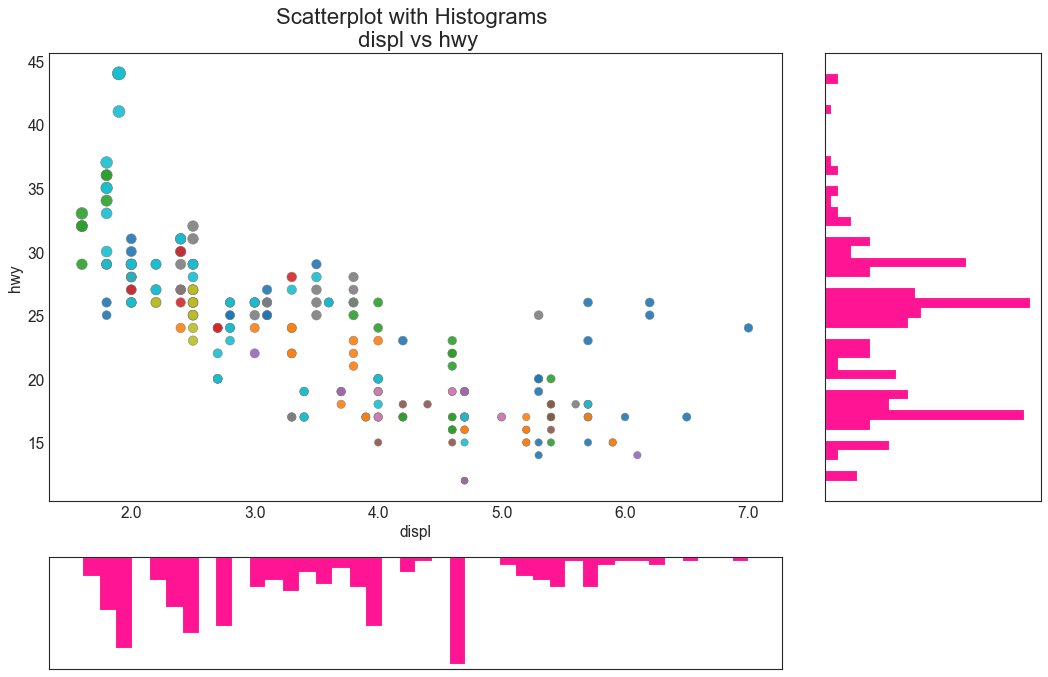

In [57]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

### 2. Deviation

   - Diverging Bars
   - Diverging Texts
   - Diverging Dot Plot
   - Diverging Lollipop Chart with Markers
   - Area Chart

### 3. Ranking

   - Ordered Bar Chart
   - Lollipop Chart
   - Dot Plot
   - Slope Chart
   - Dumbbell Plot

### 4. Distribution

   - Histogram for Continuous Variable
   - Histogram for Categorical Variable
   - Density Plot
   - Density Curves with Histogram
   - Joy Plot
   - Distributed Dot Plot
   - Box Plot
   - Dot + Box Plot
   - Violin Plot
   - Population Pyramid
   - Categorical Plots

### 5. Composition

   - Waffle Chart
   - Pie Chart
   - Treemap
   - Bar Chart

### 6. Change

   - Time Series Plot
   - Time Series with Peaks and Troughs Annotated
   - Autocorrelation Plot
   - Cross Correlation Plot
   - Time Series Decomposition Plot
   - Multiple Time Series
   - Plotting with different scales using secondary Y axis
   - Time Series with Error Bands
   - Stacked Area Chart
   - Area Chart Unstacked
   - Calendar Heat Map
   - Seasonal Plot

### 7. Groups

   - Dendrogram
   - Cluster Plot
   - Andrews Curve
   - Parallel Coordinates

## Reference

- https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/